# NATURAL GAS PRICE PRDICTION USING IBM WATSON MACHINE LAERNING SERVICE

# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data into a Pandas DataFrame for further analysis

In [3]:
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e54a7051722a4e6abc7b50d84e1c4ecc = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_e54a7051722a4e6abc7b50d84e1c4ecc = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_e54a7051722a4e6abc7b50d84e1c4ecc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oXcMTh9l6N2m6DU6TFFou_ipVskTZHSSev83Ff-Bo2O0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e54a7051722a4e6abc7b50d84e1c4ecc)

body = client_e54a7051722a4e6abc7b50d84e1c4ecc.get_object(Bucket='naturalgaspriceprediction-donotdelete-pr-e5kuh2lgmj7nro',Key='naturalgas.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


First 5 entries of the data

Splitting the Date into 3 columns

In [4]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [5]:
data.drop('Date',axis=1,inplace=True)

In [6]:
data

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


# Handling Null Values

In [7]:
data.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

As it is continuous data so we are checking it is normal distribution or skewed distribution?

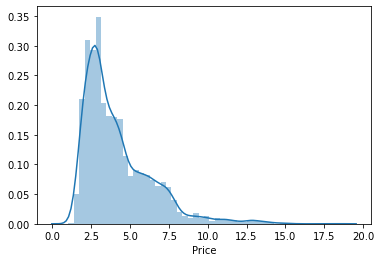

In [8]:
sns.distplot(data['Price'].dropna())

As we got normal distribution curve so we are filling NULL values with mean 

In [9]:
data['Price'].fillna(data['Price'].mean(),inplace=True)

In [10]:
data.isnull().sum()

Price    0
year     0
month    0
day      0
dtype: int64

In [11]:
data.describe()

,Price,year,month,day
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,4.189230,2008.366959,6.468003,15.712193
std,2.191026,6.825348,3.415981,8.742158
min,1.050000,1997.000000,1.000000,1.000000
25%,2.660000,2002.000000,4.000000,8.000000
50%,3.540000,2008.000000,6.000000,16.000000
75%,5.240000,2014.000000,9.000000,23.000000
max,18.480000,2020.000000,12.000000,31.000000


# Finding and Removing Outliers

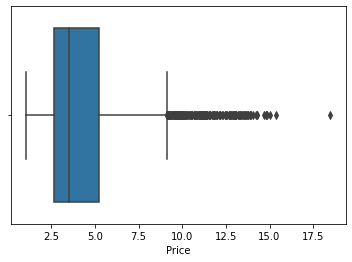

In [12]:
sns.boxplot(data['Price'])

In [13]:
from scipy import stats

In [14]:
z=np.abs(stats.zscore(data))
z

array([[0.16853354, 1.6655437 , 1.600847  , 0.99665627],
       [0.17766245, 1.6655437 , 1.600847  , 0.8822584 ],
       [0.26438712, 1.6655437 , 1.600847  , 0.76786053],
       ...,
       [0.93079774, 1.70453149, 0.44851721, 0.99665627],
       [0.91710437, 1.70453149, 0.44851721, 0.65346267],
       [0.91253992, 1.70453149, 0.44851721, 0.5390648 ]])

In [15]:
threshold=3
np.where(z>threshold)

(array([1534, 1535, 1538, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171,
        2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184,
        2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
        2196, 2197, 2198, 2199, 2200, 2209, 2210, 2213, 2214, 2215, 2216,
        2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
        2228, 2229, 2230, 2231, 2232, 2233, 2234, 2820, 2821, 2822, 2825,
        2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836,
        2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847,
        2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858,
        2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869,
        2870, 2871, 2872, 2873, 2874, 2875, 2876]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [16]:
df_no_outliers=data[(z<=3).all(axis=1)]
df_no_outliers

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


In [17]:
df_no_outliers.shape

(5821, 4)

# Data Visualization

Scatter Plot

No handles with labels found to put in legend.


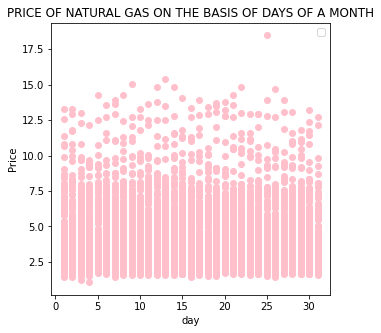

In [18]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['day'],data['Price'],color='pink')
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

No handles with labels found to put in legend.


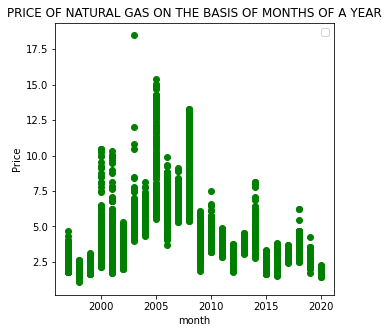

In [19]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['year'],data['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

HEAT MAP

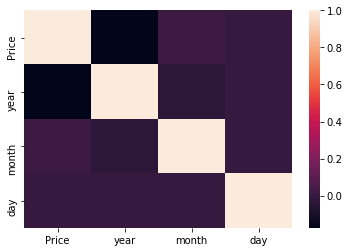

In [20]:
sns.heatmap(data.corr())

BAR GRAPH

No handles with labels found to put in legend.


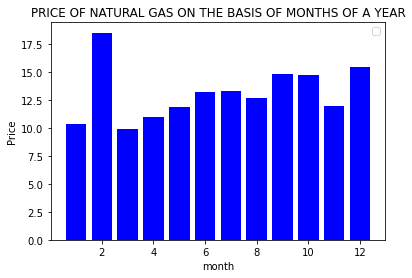

In [21]:
plt.bar(data['month'],data['Price'],color='blue')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

LINE GRAPH

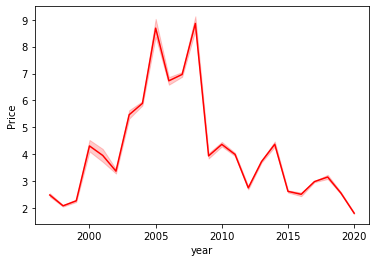

In [22]:
sns.lineplot(x='year',y='Price',data=data,color='red')

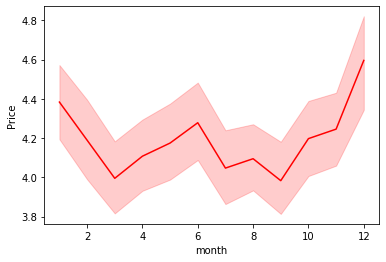

In [23]:
sns.lineplot(x='month',y='Price',data=data,color='red')

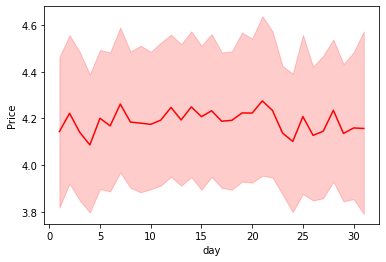

In [24]:
sns.lineplot(x='day',y='Price',data=data,color='red')

HISTOGRAM

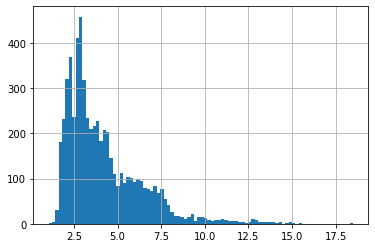

In [25]:
data['Price'].hist(bins=90)

BOX PLOT

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


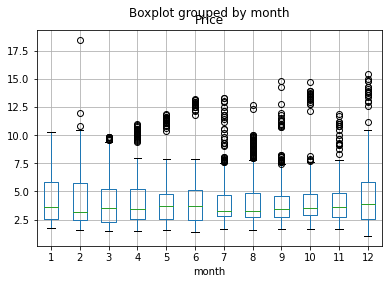

In [26]:
data.boxplot(column='Price',by='month')

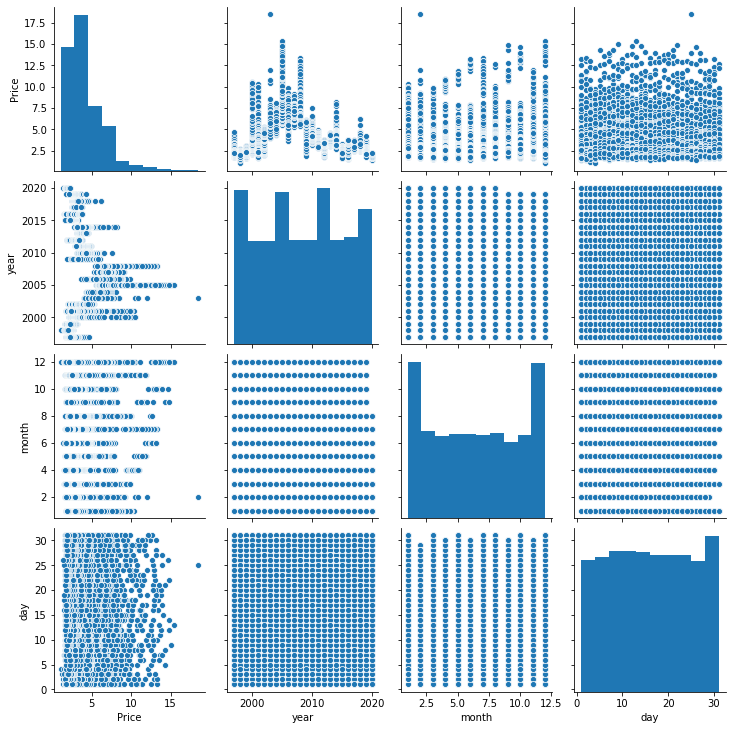

In [27]:
sns.pairplot(data)
plt.show()

# separating dependent and independent variables

In [28]:
x=data.iloc[:,1:4].values
y=data.iloc[:,0].values
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]])

In [29]:
y

array([3.82, 3.8 , 3.61, ..., 2.15, 2.18, 2.19])

In [30]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]])

In [31]:
# Encoding

In [32]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.6655437 , -1.600847  , -0.99665627],
       [-1.6655437 , -1.600847  , -0.8822584 ],
       [-1.6655437 , -1.600847  , -0.76786053],
       ...,
       [ 1.70453149,  0.44851721, -0.99665627],
       [ 1.70453149,  0.44851721, -0.65346267],
       [ 1.70453149,  0.44851721, -0.5390648 ]])

# Train and Test


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_train.shape

(4750, 3)

In [35]:
y_train.shape

(4750,)

# Model Building


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [38]:
DecisionTreeRegressor()
df_grid = GridSearchCV(DecisionTreeRegressor(),param_grid = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter': ['best', 'random'],'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10),},cv=5,n_jobs=1,scoring='neg_mean_squared_error')
df_grid.fit(x_train, y_train)
print(df_grid.best_params_)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  FitFailedWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test pa

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  FitFailedWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test pa

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  FitFailedWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test pa

{'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  FitFailedWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test pa

In [38]:
df=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=10,splitter='best')
df.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [39]:
y_pred_df=df.predict(x_test)
y_pred_df

array([3.11933333, 2.88277228, 8.24      , ..., 2.15      , 3.708     ,
       4.6204878 ])

In [40]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [41]:
from sklearn.metrics import r2_score
accur_df=r2_score(y_test,y_pred_df)
print(accur_df)

0.9748317955184738


In [44]:
!pip install ibm_watson_machine_learning

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [42]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"uu5F17zBZUwQbUxxqbnKBcp2gXt3tJXPxfaEOpgDUTL4"
}
client = APIClient(wml_credentials)

In [43]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [44]:
space_uid = guid_from_space_name(client, 'Models')
print("Space UID = " + space_uid)

Space UID = d8058598-9592-4f86-9af6-fc367e1d2033


In [45]:
client.set.default_space(space_uid)

'SUCCESS'

In [46]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [47]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [ ]:
model_details = client.repository.store_model(model=df,meta_props={
    client.repository.ModelMetaNames.NAME:"DecisionTreeRegressor",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid })
model_id = client.repository.get_model_uid(model_details)
model_id

In [48]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(df, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# Random Forest Regerssor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfr = RandomForestRegressor(n_estimators=1, random_state=10)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([3.54, 3.04, 7.4 , ..., 2.16, 3.77, 4.35])

In [51]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [52]:
accur_rfr=r2_score(y_test,y_pred_rfr)
print(accur_rfr)

0.9773693648709125


In [ ]:
model_details_2 = client.repository.store_model(model=rfr,meta_props={
    client.repository.ModelMetaNames.NAME:"RandomForestRegressor",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid })
model_id_2 = client.repository.get_model_uid(model_details_2)
model_id_2

# Model Evaluation for Decision Tree Regressor

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_df)

0.21485846441380746

In [56]:
mean_squared_error(y_test,y_pred_df)

0.13334633294081272

In [57]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred_df))

0.3651661716818971

# Model Evaluation for Random Forest Regressor


In [58]:
mean_absolute_error(y_test,y_pred_rfr)

0.18007575757575758

In [59]:
mean_squared_error(y_test,y_pred_rfr)

0.11990176767676768

In [60]:
sqrt(mean_squared_error(y_test,y_pred_rfr))

0.3462683463396094